In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load dataset
df = pd.read_csv("./Airlines.csv")

In [3]:
# Display basic info about dataset
print("Dataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB

Summary Statistics:
                 id         Flight      DayOfWeek           Time  \
count  539383.00000  539383.000000  539383.000000  539383.000000   
mean   269692.00000    2427.928630       3.929668     802.728963   
std    155706.60446    2067.429837       1.914664     278.045911   
min         1.00000       1.000000       1.000000      10.000000   
25

In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64


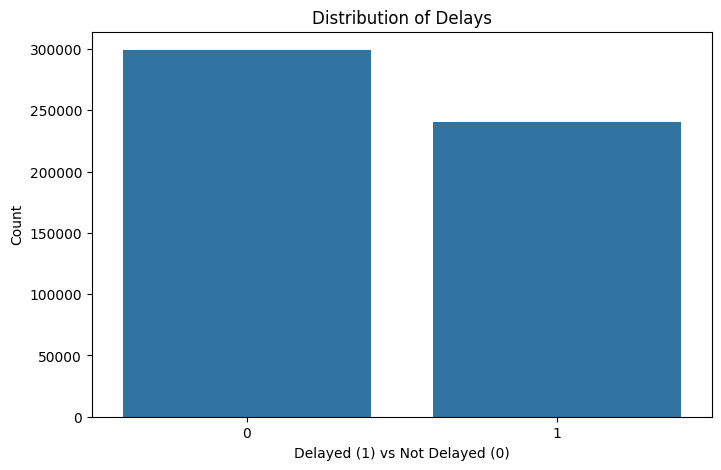

In [5]:
# Plot distribution of Delay variable
plt.figure(figsize=(8,5))
sns.countplot(x=df['Delay'])
plt.title("Distribution of Delays")
plt.xlabel("Delayed (1) vs Not Delayed (0)")
plt.ylabel("Count")
plt.show()

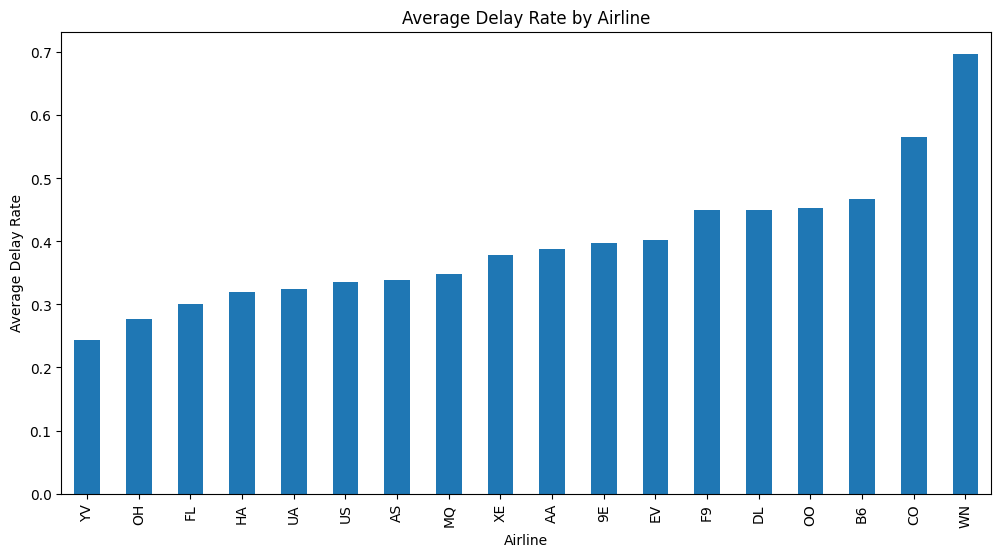

In [6]:
# Airline-wise Delay Analysis
plt.figure(figsize=(12,6))
df.groupby('Airline')['Delay'].mean().sort_values().plot(kind='bar')
plt.title("Average Delay Rate by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Delay Rate")
plt.show()

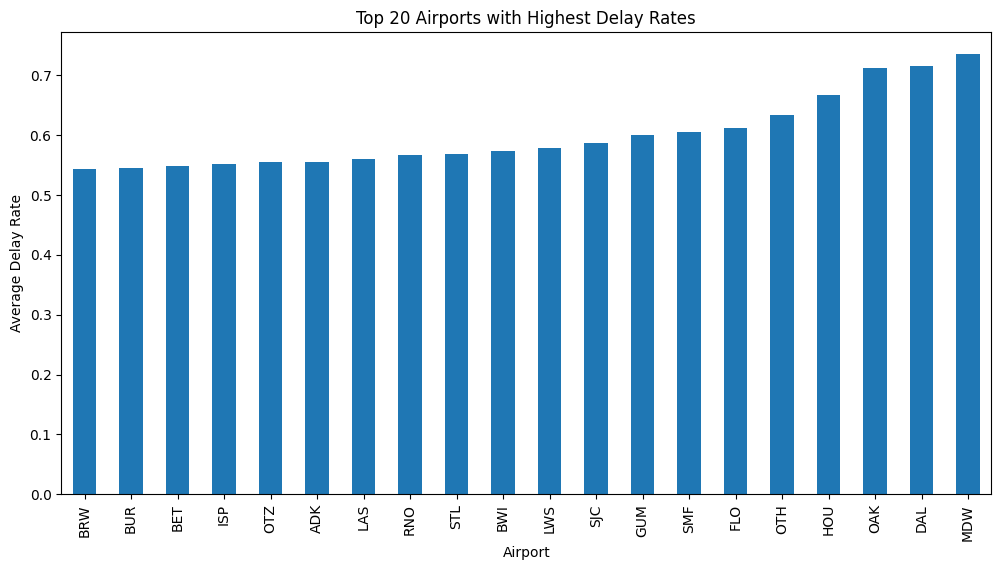

In [7]:
# Airport-wise Delay Analysis
plt.figure(figsize=(12,6))
df.groupby('AirportFrom')['Delay'].mean().sort_values().tail(20).plot(kind='bar')
plt.title("Top 20 Airports with Highest Delay Rates")
plt.xlabel("Airport")
plt.ylabel("Average Delay Rate")
plt.show()

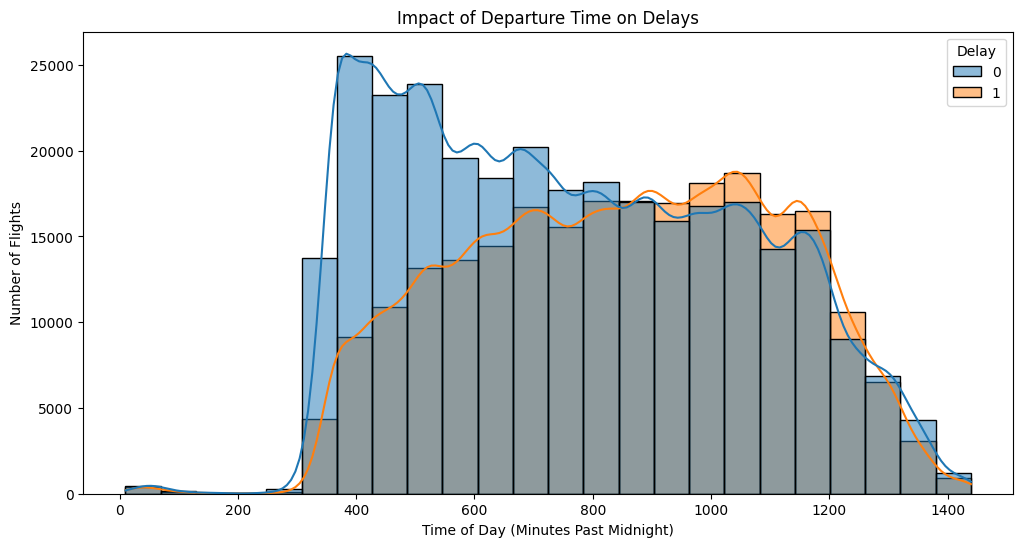

In [8]:
# Departure Time vs Delays
plt.figure(figsize=(12,6))
sns.histplot(df, x='Time', hue='Delay', bins=24, kde=True)
plt.title("Impact of Departure Time on Delays")
plt.xlabel("Time of Day (Minutes Past Midnight)")
plt.ylabel("Number of Flights")
plt.show()

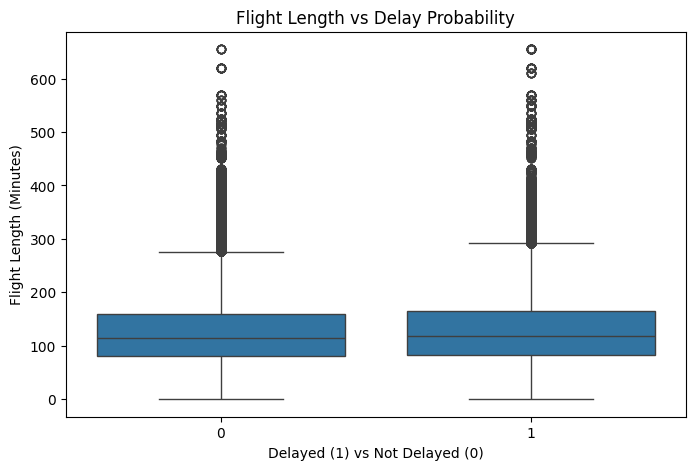

In [9]:
# Flight Length vs Delay Probability
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Delay'], y=df['Length'])
plt.title("Flight Length vs Delay Probability")
plt.xlabel("Delayed (1) vs Not Delayed (0)")
plt.ylabel("Flight Length (Minutes)")
plt.show()

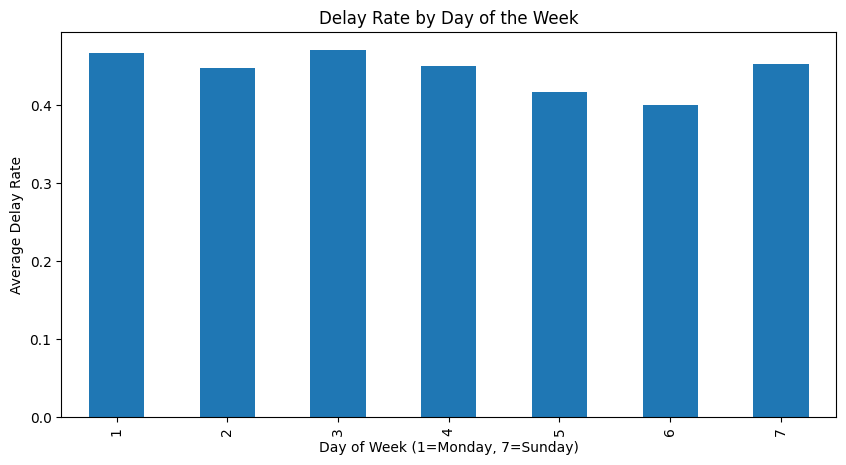

In [10]:
# Day of the Week vs Delay Analysis
plt.figure(figsize=(10,5))
df.groupby('DayOfWeek')['Delay'].mean().plot(kind='bar')
plt.title("Delay Rate by Day of the Week")
plt.xlabel("Day of Week (1=Monday, 7=Sunday)")
plt.ylabel("Average Delay Rate")
plt.show()

In [ ]:
# Correlation Heatmap
# df_encoded = pd.get_dummies(df, columns=['Airline', 'AirportFrom', 'AirportTo'])
# plt.figure(figsize=(8,6))
# sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
# plt.title("Feature Correlation Heatmap")
# plt.show()